In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras import models

In [2]:
#load fashin mnist dataset
(training_images, training_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()
print(training_images.shape)

(60000, 28, 28)


In [3]:
#reshape
training_images = training_images.reshape(training_images.shape[0], 28,28,1)
test_images = test_images.reshape(test_images.shape[0], 28,28,1)
print(training_images.shape)

(60000, 28, 28, 1)


Model: "cnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               20

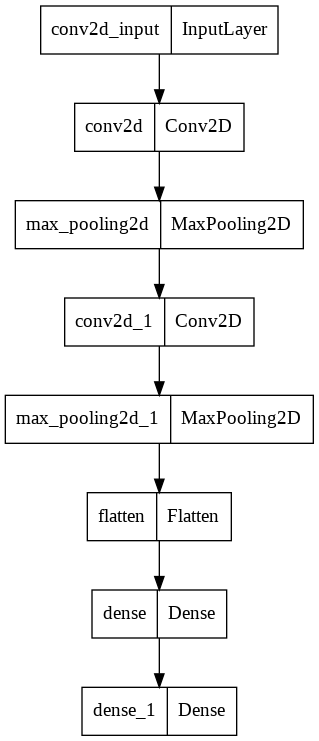

In [4]:
#define model
def get_model_cnn():
  model_cnn = tf.keras.models.Sequential(name="cnn_model")
  model_cnn.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
  model_cnn.add(keras.layers.MaxPooling2D(2,2))
  model_cnn.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
  model_cnn.add(keras.layers.MaxPooling2D((2,2)))
  model_cnn.add(tf.keras.layers.Flatten())
  model_cnn.add(tf.keras.layers.Dense(128, activation=keras.activations.relu))
  model_cnn.add(tf.keras.layers.Dense(10, activation='softmax'))

  model_cnn.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

  return model_cnn

model_cnn = get_model_cnn()
model_cnn.summary()
plot_model(model_cnn, to_file="model_cnn.png")

In [5]:
history =model_cnn.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 5ms/step - loss: 0.6184 - accuracy: 0.8230
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3354 - accuracy: 0.8762
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2938 - accuracy: 0.8903
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2629 - accuracy: 0.9024
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2423 - accuracy: 0.9097


In [6]:
test_loss, test_acc = model_cnn.evaluate(test_images, test_labels)
print(test_acc)

313/313 [==============================] - 2s 4ms/step - loss: 0.3201 - accuracy: 0.8878
0.8877999782562256


filter = 1


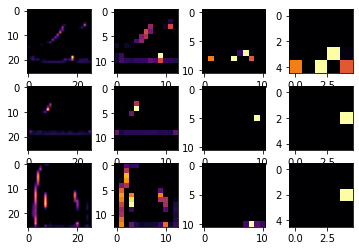

filter = 2


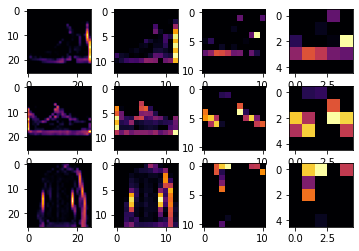

filter = 3


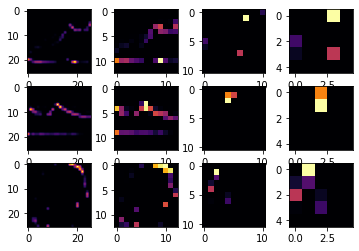

filter = 4


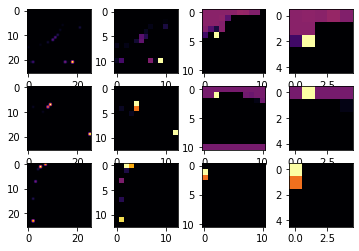

filter = 5


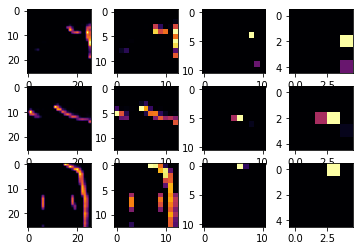

filter = 6


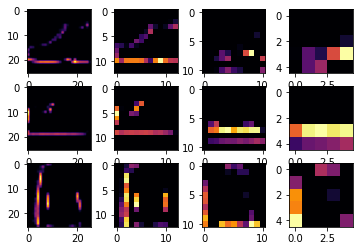

filter = 7


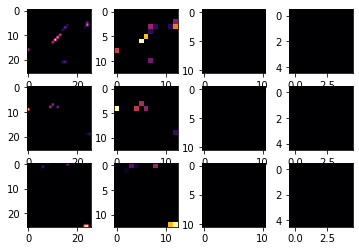

filter = 8


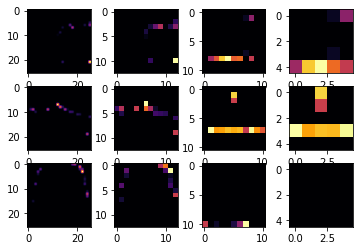

filter = 9


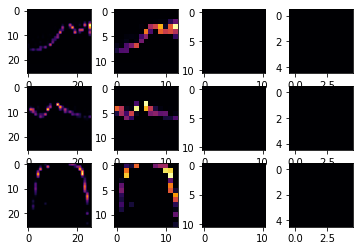

filter = 10


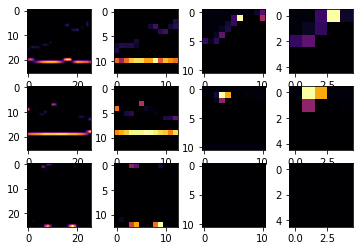

filter = 11


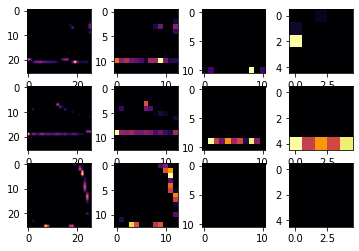

filter = 12


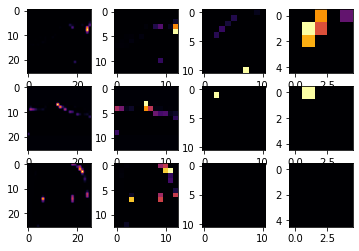

filter = 13


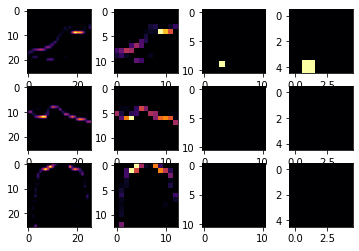

filter = 14


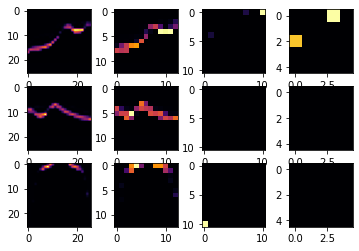

filter = 15


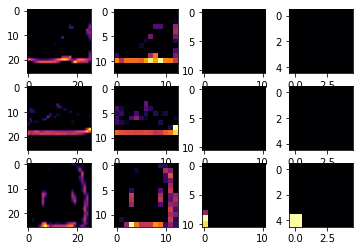

filter = 16


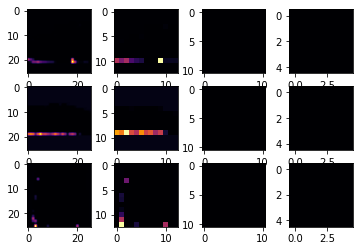

filter = 17


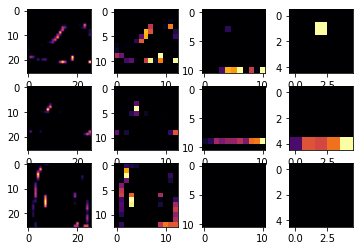

filter = 18


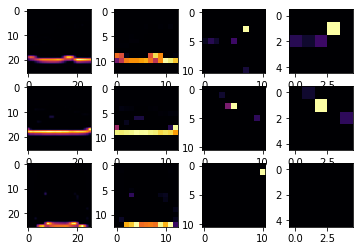

filter = 19


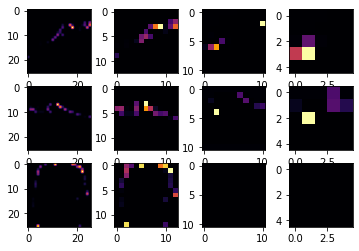

filter = 20


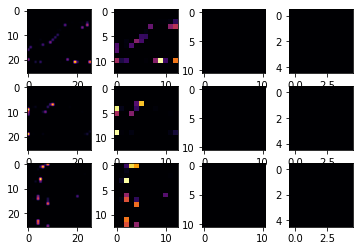

filter = 21


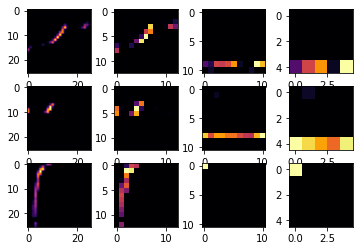

filter = 22


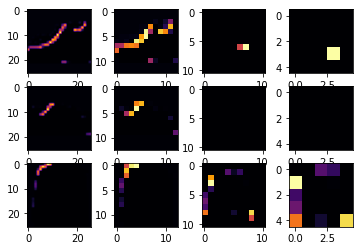

filter = 23


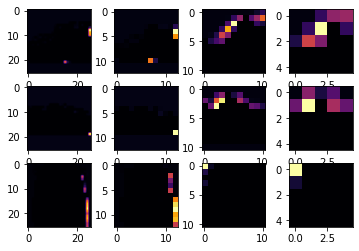

filter = 24


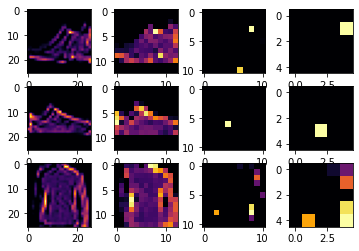

filter = 25


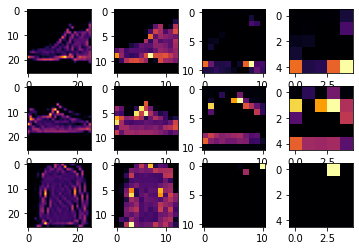

filter = 26


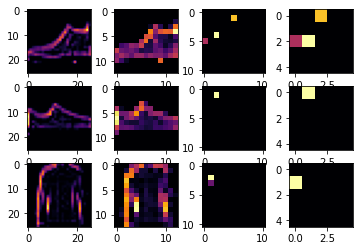

filter = 27


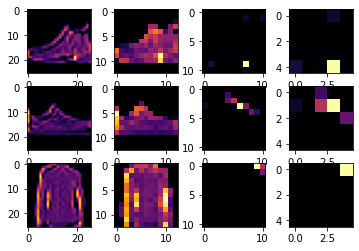

filter = 28


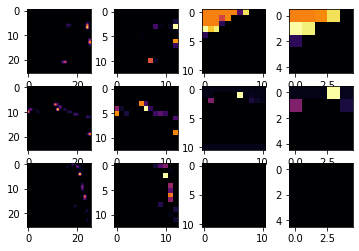

filter = 29


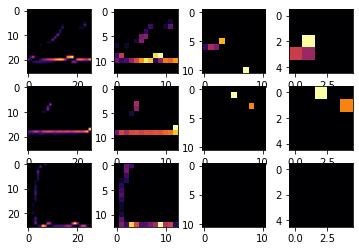

filter = 30


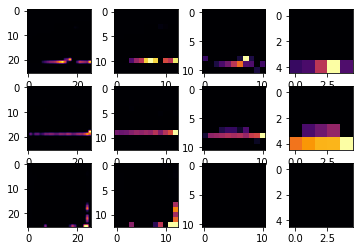

filter = 31


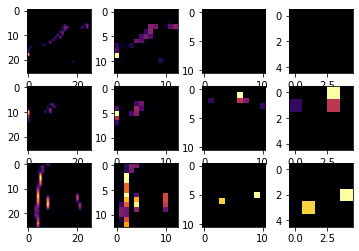

filter = 32


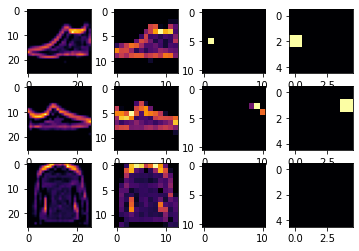

In [7]:
import matplotlib.pyplot as plt

layer_outputs = [layer.output for layer in model_cnn.layers]
activation_model = tf.keras.models.Model(inputs = model_cnn.input, outputs = layer_outputs)
for cnn_filter in range(0,32):
  f, axarr = plt.subplots(3,4)
  print('filter =', cnn_filter+1)
  for x in range(0,4):
    f1 = activation_model.predict(test_images[0].reshape(1, 28, 28, 1))[x]
    axarr[0,x].imshow(f1[0, : , :, cnn_filter], cmap='inferno')
    axarr[0,x].grid(False)

    f2 = activation_model.predict(test_images[12].reshape(1, 28, 28, 1))[x]
    axarr[1,x].imshow(f2[0, : , :, cnn_filter], cmap='inferno')
    axarr[1,x].grid(False)

    f3 = activation_model.predict(test_images[26].reshape(1, 28, 28, 1))[x]
    axarr[2,x].imshow(f3[0, : , :, cnn_filter], cmap='inferno')
    axarr[2,x].grid(False)
  plt.show()

In [8]:
import os
os.mkdir("myModel")
model_cnn.save("myModel/model_cnn.h5")
model_cnn.save_weights("myModel/model_cnn_wights.h5")